In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import warnings
import nltk
import string
import seaborn as sns
from nltk.stem.porter import * 
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
combine = train.append(test,ignore_index=True)

In [3]:
def collectHashtag(x):
    hashtags = []    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [4]:
combine.dropna(inplace=True)
combine['tweet'] = combine['tweet'].str.lower()

In [5]:
HT_negative = collectHashtag(combine['tweet'][combine['sentiment'] == 0])
#Nested List to Un-nested List
HT_negative = sum(HT_negative,[])

HT_neutral = collectHashtag(combine['tweet'][combine['sentiment'] == 1])
HT_neutral = sum(HT_neutral,[])

HT_positive = collectHashtag(combine['tweet'][combine['sentiment'] == 2])
HT_positive = sum(HT_positive,[])

HT_cant_tell = collectHashtag(combine['tweet'][combine['sentiment'] == 2])
HT_cant_tell = sum(HT_cant_tell,[])

In [6]:
corpus_negative = nltk.FreqDist(HT_negative)
corpus_positive = nltk.FreqDist(HT_positive)
corpus_neutral = nltk.FreqDist(HT_neutral)
corpus_cant_tell = nltk.FreqDist(HT_cant_tell)

In [7]:
matplotlib.rcParams.update({'font.size': 22})

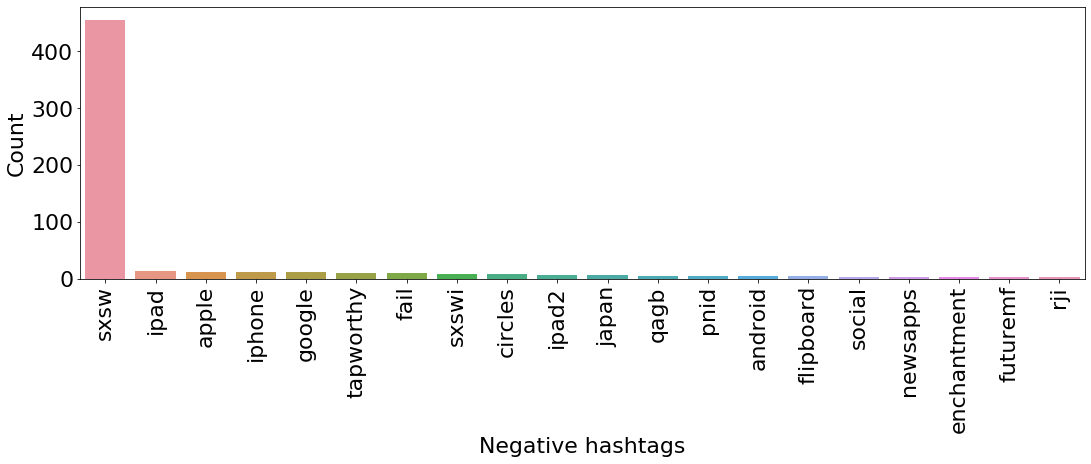

In [8]:
d = pd.DataFrame({'Negative hashtags':list(corpus_negative.keys()),'Count':list(corpus_negative.values())})
d = d.nlargest(columns='Count',n=20)
plt.figure(figsize=(18,5))
ax = sns.barplot(data = d,x = 'Negative hashtags',y = 'Count')

plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

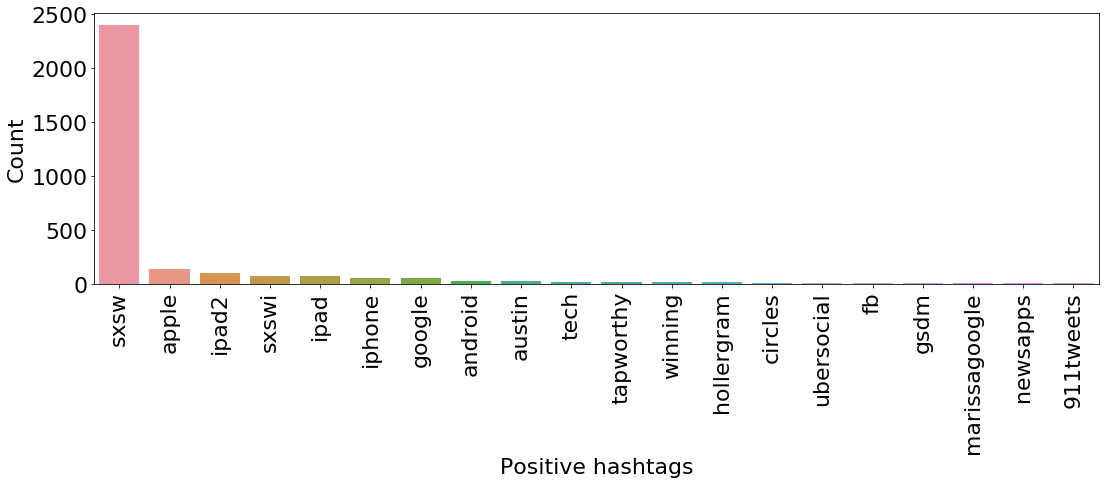

In [9]:
d = pd.DataFrame({'Positive hashtags':list(corpus_positive.keys()),'Count':list(corpus_positive.values())})
d = d.nlargest(columns='Count',n=20)
plt.figure(figsize=(18,5))
ax = sns.barplot(data = d,x = 'Positive hashtags',y = 'Count')

plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

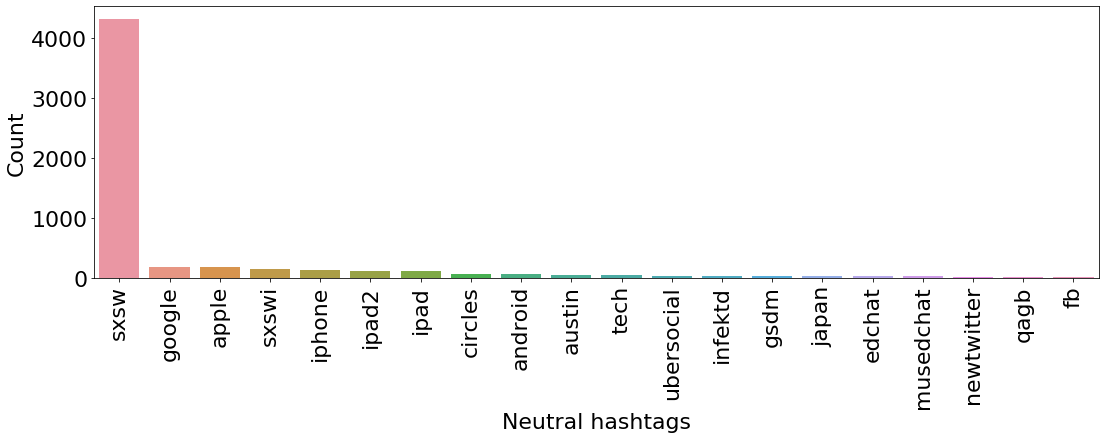

In [10]:
d = pd.DataFrame({'Neutral hashtags':list(corpus_neutral.keys()),'Count':list(corpus_neutral.values())})
d = d.nlargest(columns='Count',n=20)
plt.figure(figsize=(18,5))
ax = sns.barplot(data = d,x = 'Neutral hashtags',y = 'Count')

plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

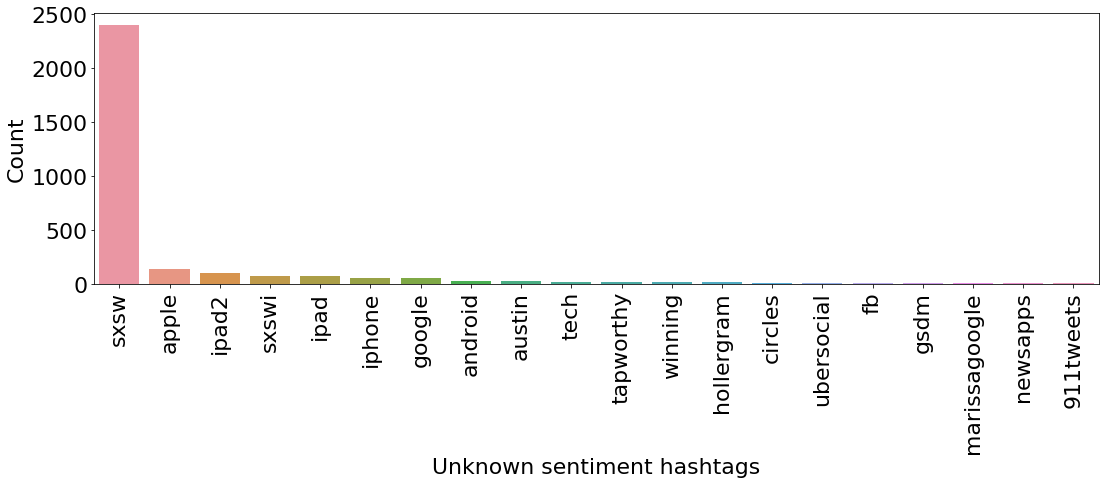

In [11]:
d = pd.DataFrame({'Unknown sentiment hashtags':list(corpus_cant_tell.keys()),'Count':list(corpus_cant_tell.values())})
d = d.nlargest(columns='Count',n=20)
plt.figure(figsize=(18,5))
ax = sns.barplot(data = d,x = 'Unknown sentiment hashtags',y = 'Count')

plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [12]:
def plot_horizontal(df, col_name, title, top=10):
    new_df = df[df[col_name] != 'unknown']
    job_col = new_df[col_name].value_counts().rename_axis(col_name).reset_index(name='Count')
    top_count = job_col.sort_values('Count', ascending=False)[:top]
    ax = top_count.plot.barh(x=col_name, y='Count',figsize=(15,8), title=title)
    ax.invert_yaxis()

In [13]:
from pylab import *

In [14]:
a_dictionary = {'Japan':122, 'Canada':5 , u'Australia':3, u'Singapore':3, u'SouthAfrica ':3, 
                u'China':2, u'Brazil':2, u'UK':1, u'Pakistan':2}

c_name = ['Japan', 'Canada', 'Australia', 'Singapore', 'South Africa', 'China', 'Brazil', 'UK', 'Pakistan']
freq = [122, 5, 3, 3, 3, 2, 2, 1, 2]

country_df = pd.DataFrame({'Country': c_name, 'Frequency': freq})
country_df

,Country,Frequency
0,Japan,122
1,Canada,5
2,Australia,3
3,Singapore,3
4,South Africa,3
5,China,2
6,Brazil,2
7,UK,1
8,Pakistan,2


In [15]:
def plot_horizontal(df, col_name, title, top=10):
    new_df = df[df[col_name] != 'unknown']
    job_col = new_df[col_name].value_counts().rename_axis(col_name).reset_index(name='Frequency')
    top_count = job_col.sort_values('Frequency', ascending=False)[:top]
    ax = top_count.plot.barh(x=col_name, y='Frequency',figsize=(15,8), title=title)
    ax.invert_yaxis()

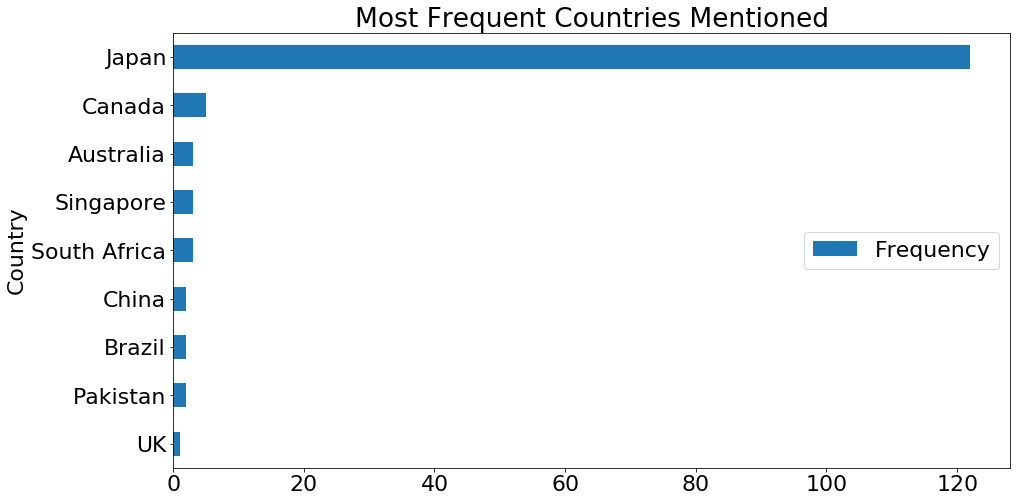

In [16]:
top_count = country_df.sort_values('Frequency', ascending=False)
ax = top_count.plot.barh(x='Country', y='Frequency',figsize=(15,8), title='Most Frequent Countries Mentioned')
ax.invert_yaxis()
ax.legend(loc="center right")